In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_csv('/content/sales_data_sample.csv',encoding='latin1')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

In [9]:
df.dropna(subset=['ORDERDATE', 'SALES'], inplace=True)

In [11]:
daily_sales = df.groupby('ORDERDATE').agg({'SALES': 'sum'}).reset_index()
daily_sales.head()

,ORDERDATE,SALES
0,2003-01-06,12133.25
1,2003-01-09,11432.34
2,2003-01-10,6864.05
3,2003-01-29,54702.00
4,2003-01-31,44621.96


In [14]:
daily_sales['DayNumber'] = (daily_sales['ORDERDATE'] - daily_sales['ORDERDATE'].min()).dt.days
#FEATURES TO TARGET
X = daily_sales[['DayNumber']]
y = daily_sales['SALES']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 632915928.0435237
R² Score: 0.0065976454123980455


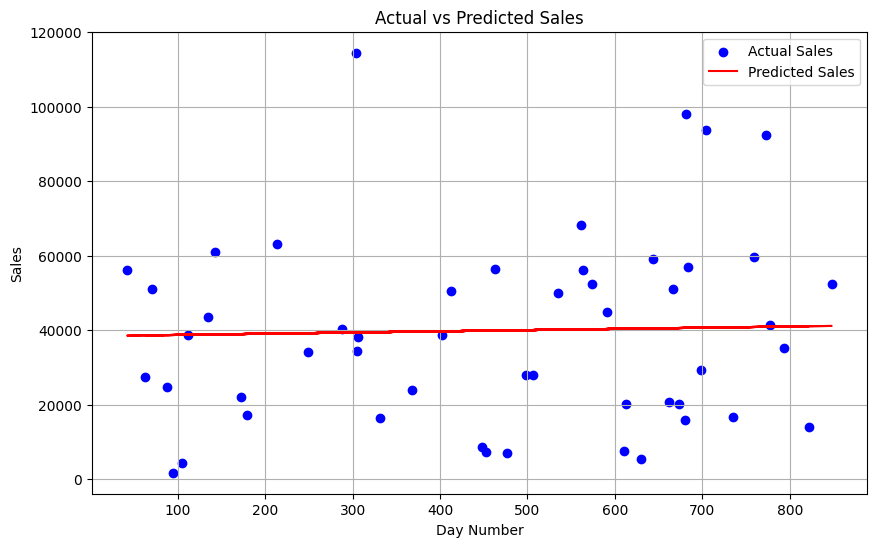

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, label='Actual Sales', color='blue')
plt.plot(X_test, y_pred, label='Predicted Sales', color='red')
plt.xlabel("Day Number")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()


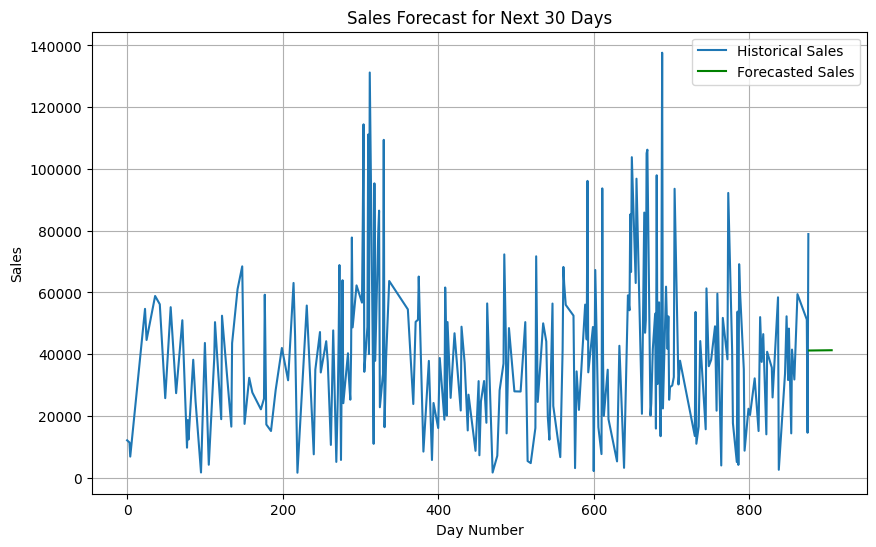

In [19]:
import numpy as np
future_days = pd.DataFrame({'DayNumber': np.arange(X['DayNumber'].max()+1, X['DayNumber'].max()+31)})
future_sales = model.predict(future_days)
# Plot Visualization
plt.figure(figsize=(10,6))
plt.plot(daily_sales['DayNumber'], daily_sales['SALES'], label='Historical Sales')
plt.plot(future_days['DayNumber'], future_sales, label='Forecasted Sales', color='green')
plt.xlabel("Day Number")
plt.ylabel("Sales")
plt.title("Sales Forecast for Next 30 Days")
plt.legend()
plt.grid(True)
plt.show()